In [1]:
import pandas as pd
df=pd.read_csv("df_train_corr.csv")
s=df.columns
df# saco csv
from sklearn.preprocessing import minmax_scale 
df["ScreenResolution"]=minmax_scale(df["ScreenResolution"])
df["ScreenResolution"].unique()
import seaborn as sns



<Axes: >

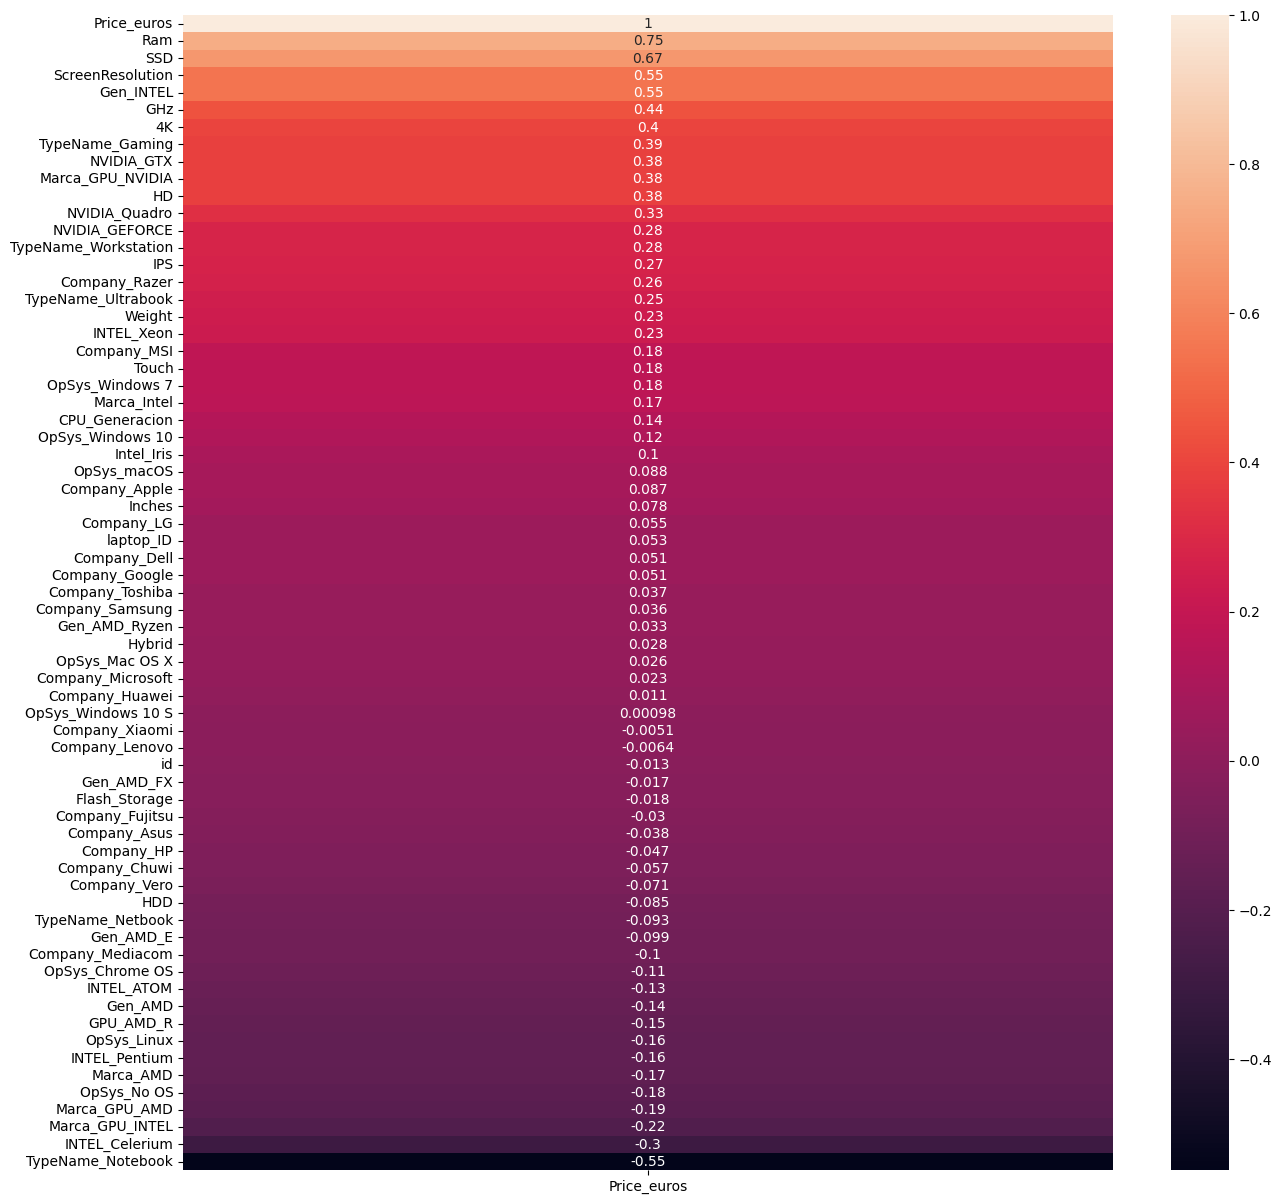

In [2]:
import matplotlib.pyplot as plt
corr=df.corr()[['Price_euros']]
corr
plt.figure(figsize=(15,15))
sns.heatmap(corr[['Price_euros']].sort_values(by='Price_euros', ascending=False), annot=True)


In [3]:
# miro la correlacion dcon los euros
s


Index(['id', 'laptop_ID', 'Inches', 'Ram', 'ScreenResolution', 'Weight',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'OpSys_Chrome OS', 'OpSys_Linux',
       'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS', 'Touch', 'IPS',
       '4K', 'HD', 'HDD', 'SSD', 'Flash_Storage', 'Hybrid', 'GHz',
       'Marca_Intel', 'Marca_AMD', 'CPU_Generacion', 'Gen_AMD', 'Gen_AMD_E',
       'Gen_AMD_Ryzen', 'Gen_AMD_FX', 'Gen_INTEL', 'INTEL_ATOM',
       'INTEL_Celerium', 'INTEL_Pentium', 'INTEL_Xeon', 'Marca_GPU_NVIDIA',
  

In [4]:
corr[corr["Price_euros"].abs()>0.20].index

Index(['Ram', 'ScreenResolution', 'Weight', 'Company_Razer', 'TypeName_Gaming',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'IPS', '4K', 'HD', 'SSD', 'GHz', 'Gen_INTEL', 'INTEL_Celerium',
       'INTEL_Xeon', 'Marca_GPU_NVIDIA', 'Marca_GPU_INTEL', 'NVIDIA_GEFORCE',
       'NVIDIA_Quadro', 'NVIDIA_GTX', 'Price_euros'],
      dtype='object')

In [5]:

# solo saco las columnas de mas de 0,2
Feeatures=[ 'Ram', 'ScreenResolution', 'Weight', 'Company_Razer', 'TypeName_Gaming',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'IPS', '4K', 'HD', 'SSD', 'GHz', 'Gen_INTEL', 'INTEL_Celerium',
       'INTEL_Xeon', 'Marca_GPU_NVIDIA', 'Marca_GPU_INTEL', 'NVIDIA_GEFORCE',
       'NVIDIA_Quadro', 'NVIDIA_GTX']
X=df[Feeatures]
# X=df.drop("Price_euros", axis=1)
y=df["Price_euros"]


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 24)

len(Feeatures)

21

R2 train 0.9925429505349168
R2 test 0.7730019848570954
cross_val 0.7927595550168707


np.float64(211.07834501672963)

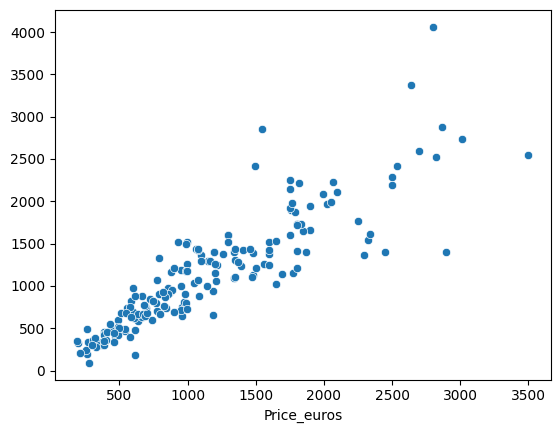

In [7]:
import xgboost
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error
xgb_reg = xgboost.XGBRegressor(random_state=42)

xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
sns.scatterplot( x=y_test,y= y_pred)
print("R2 train", xgb_reg.score(X_train, y_train))
print("R2 test",xgb_reg.score(X_test, y_test))
print("cross_val", cross_validate(xgb_reg, X_train, y_train, cv=5)["test_score"].mean())
mean_absolute_error(y_test, y_pred)


In [8]:
from sklearn.model_selection import GridSearchCV

xgb_reg = xgboost.XGBRegressor(random_state=42)

reg_log_param = {    
                 "booster": ['gbtree', 'gblinear', 'dart'],
                 
                 
                 "eta":[0.1, 0.3,  0.5, 0.75],
                 "gamma":[0, 1,10],
                 "max_depth":[6],
                  "alpha": [0, 1],
                  "tree_method":["auto","exact", "approx", "hist" ], "random_state":[42]
                }


search = GridSearchCV(xgb_reg,
                           reg_log_param,
                           
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1,
                           cv=10)


In [9]:
search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=Non...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 1],
                         'booster': ['gbtree', 'gblinear', 'dart'],
                         'eta': [0.1, 0.3, 0.5, 0.75], 'gamma': [0, 1, 10],
                         'max_depth': [6], 'random_state': [42],
                         'tree_method': ['auto', 'exact', 'approx', 'hist']},
             scoring='neg_mean_absolute_error')

In [10]:
search.best_params_

{'alpha': 0,
 'booster': 'dart',
 'eta': 0.1,
 'gamma': 0,
 'max_depth': 6,
 'random_state': 42,
 'tree_method': 'exact'}

In [11]:
xgb_reg = xgboost.XGBRegressor(alpha= 0,
 booster= 'dart',
 eta= 0.2,
 gamma= 0,

 max_depth= 6,
 random_state= 42,

 tree_method= 'exact')
xgb_reg.fit(X_train, y_train)

XGBRegressor(alpha=0, base_score=None, booster='dart', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=0,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, ...)

R2 train 0.9872574585030209
R2 test 0.786164570885618
cross_val 0.8034469852675048


np.float64(208.32967222453468)

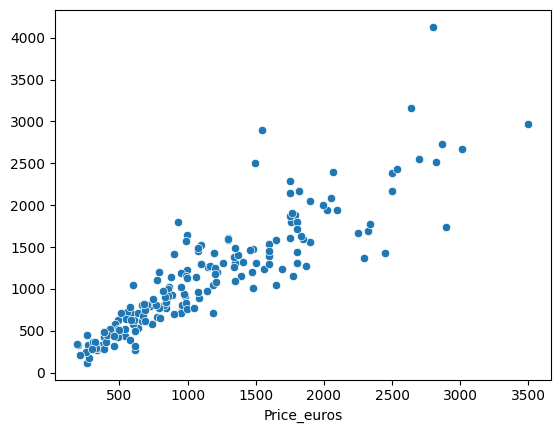

In [12]:
y_pred = xgb_reg.predict(X_test)
sns.scatterplot( x=y_test,y= y_pred)
print("R2 train", xgb_reg.score(X_train, y_train))
print("R2 test",xgb_reg.score(X_test, y_test))
print("cross_val", cross_validate(xgb_reg, X_train, y_train, cv=5)["test_score"].mean())
mean_absolute_error(y_test, y_pred)


In [13]:
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

trace1 = go.Scatter(
                    x =y_test ,
                    y = y_pred,
                    name = 'citations',
                    mode= "markers",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))
data = [trace1]

layout = dict(title = "Modelo lineal",
             xaxis= dict(title= 'Precio real',ticklen= 5),
            yaxis= dict(title= 'Precio estimado',ticklen= 5)
           )

fig = go.Figure(data = data, layout=layout)

iplot(fig)

In [14]:
df_test=pd.read_csv("df_test_corr.csv")
df_test["ScreenResolution"]=minmax_scale(df_test["ScreenResolution"])
y_res=xgb_reg.predict(df_test[Feeatures])
y_res.round(2)
respuesta=pd.DataFrame(df_test["id"])

respuesta["Price_euros"]=y_res.round(2)
respuesta


,id,Price_euros
0,181,2162.719971
1,708,421.399994
2,862,433.649994
3,1064,1198.290039
4,702,1300.619995
...,...,...
386,1281,1262.869995
387,524,2018.760010
388,1015,909.130005
389,1236,344.269989


In [16]:
respuesta.to_csv("respuesta_regresion_x.csv", sep=",", index=False)